Epoch 1/50
11/11 [==============================] - 7s 423ms/step - loss: 0.6648 - val_loss: 0.6317
Epoch 2/50
11/11 [==============================] - 3s 303ms/step - loss: 0.6077 - val_loss: 0.6055
Epoch 3/50
11/11 [==============================] - 3s 310ms/step - loss: 0.5739 - val_loss: 0.5807
Epoch 4/50
11/11 [==============================] - 4s 324ms/step - loss: 0.5525 - val_loss: 0.5671
Epoch 5/50
11/11 [==============================] - 3s 307ms/step - loss: 0.5419 - val_loss: 0.5590
Epoch 6/50
11/11 [==============================] - 3s 306ms/step - loss: 0.5362 - val_loss: 0.5546
Epoch 7/50
11/11 [==============================] - 3s 314ms/step - loss: 0.5352 - val_loss: 0.5535
Epoch 8/50
11/11 [==============================] - 3s 314ms/step - loss: 0.5333 - val_loss: 0.5520
Epoch 9/50
11/11 [==============================] - 3s 311ms/step - loss: 0.5318 - val_loss: 0.5509
Epoch 10/50
11/11 [==============================] - 3s 311ms/step - loss: 0.5295 - val_loss: 0.5486

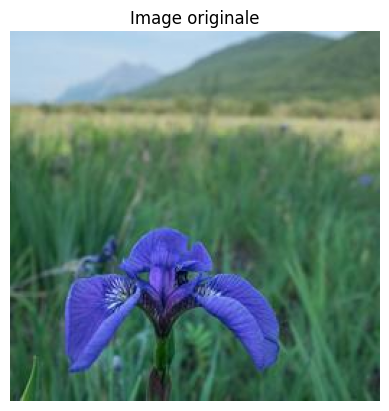

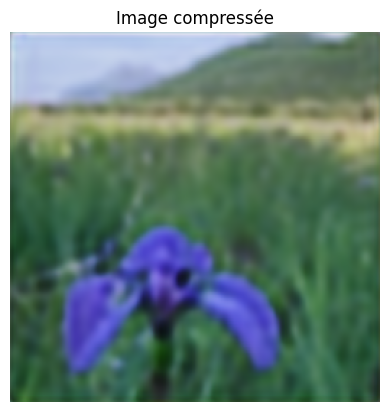

Taille totale de la base de données avant compression: 1097716 octets
Taille totale de la base de données après compression: 425040 octets
Taux de compression en pourcentage: 61.27960237438464 %
Efficacité de compression en pourcentage: 97.5730412837064 %


In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image

# Definition of training and testing directories
train_dir = '/content/drive/MyDrive/iris/train'
test_dir = '/content/drive/MyDrive/iris/test'

# Function to load images
def load_images(directory):
    images = []
    for filename in os.listdir(directory):
        img = Image.open(os.path.join(directory, filename))
        img = img.resize((256, 256), resample=Image.LANCZOS)  # Using a different resampling method
        img = np.array(img) / 255.0  # Normalize images after resizing
        images.append(img)
    return np.array(images)

# Load training and testing data
train_images = load_images(train_dir)
test_images = load_images(test_dir)

# Autoencoder model creation
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2), padding='same'),  # Adding additional MaxPooling layers
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),  # Adding additional convolution layers
    tf.keras.layers.UpSampling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.UpSampling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.UpSampling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')
])

# Model compilation
model.compile(optimizer='adam', loss='binary_crossentropy')

# Training the model with more epochs
model.fit(train_images, train_images, epochs=50, batch_size=32, validation_data=(test_images, test_images))


# Compression of all test images
compressed_images = model.predict(test_images)

# Choosing a test image for display
test_image_index = 0

# Displaying the original image
plt.imshow(test_images[test_image_index])
plt.title('Original Image')
plt.axis('off')
plt.show()

# Displaying the compressed image
plt.imshow(compressed_images[test_image_index].squeeze())
plt.title('Compressed Image')
plt.axis('off')
plt.show()

# Total size of the database before compression
total_size_before = sum(os.path.getsize(os.path.join(test_dir, filename)) for filename in os.listdir(test_dir))
print('Total size of the database before compression:', total_size_before, 'bytes')

# Total size of the database after compression
total_size_after = sum(os.path.getsize('compressed_image.jpg') for _ in range(len(compressed_images)))
print('Total size of the database after compression:', total_size_after, 'bytes')

# Compression rate
# Compression rate in percentage
compression_percentage = (1 - total_size_after / total_size_before) * 100
print('Compression rate in percentage:', compression_percentage, '%')

# Calculating the Mean Squared Error (MSE) between original and compressed images
mse = np.mean(np.square(test_images - compressed_images))

# Normalizing MSE to obtain a value between 0 and 1
mse_norm = mse / np.mean(np.square(test_images))

# Compression efficiency
compression_efficiency = (1 - mse_norm) * 100
print('Compression efficiency in percentage:', compression_efficiency, '%')
